In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r'C:\Users\subra\OneDrive\Desktop\datasets\advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Getting familiar with the dataset

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Checking for null values

In [5]:
df.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

### Exploratory Data Analysis

Gender distribution 

In [6]:
df.Male.value_counts()

0    519
1    481
Name: Male, dtype: int64

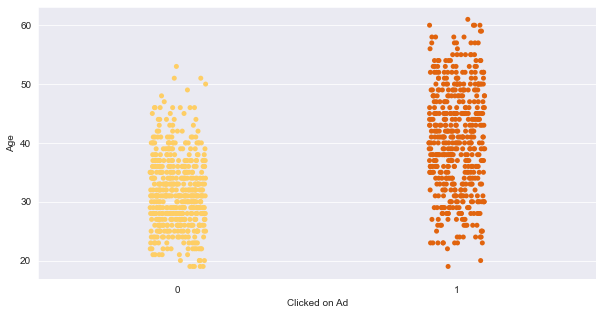

In [55]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df['Clicked on Ad'], y=df['Age'], palette='YlOrBr')
plt.show()

People from age 25-40 tend to avoid clicking ads the most.Interestingly the age group tending to click ads is 20-55.

We can also notice that older people are more prone to a successful clicking on ads

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

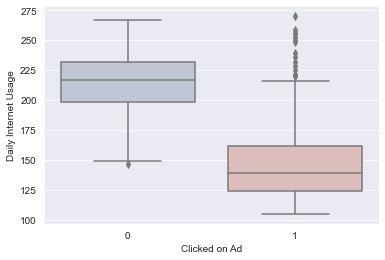

In [53]:
sns.boxplot(df['Clicked on Ad'], df['Daily Internet Usage'], data=df, palette='vlag')

We can see that people who spend more time in the internet tend to avoid clicking on ads.

Ads are more prone to be clicked by people who spend less time on the internet.

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

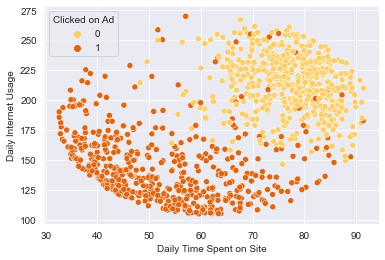

In [52]:
sns.scatterplot(df['Daily Time Spent on Site'], df['Daily Internet Usage'], hue=df['Clicked on Ad'], data=df, palette='YlOrBr')

This visualization also supports the above statement.

Additionally people spending more time in a site also avoid clicking to ads.

### Heat map showing correlation between different variables

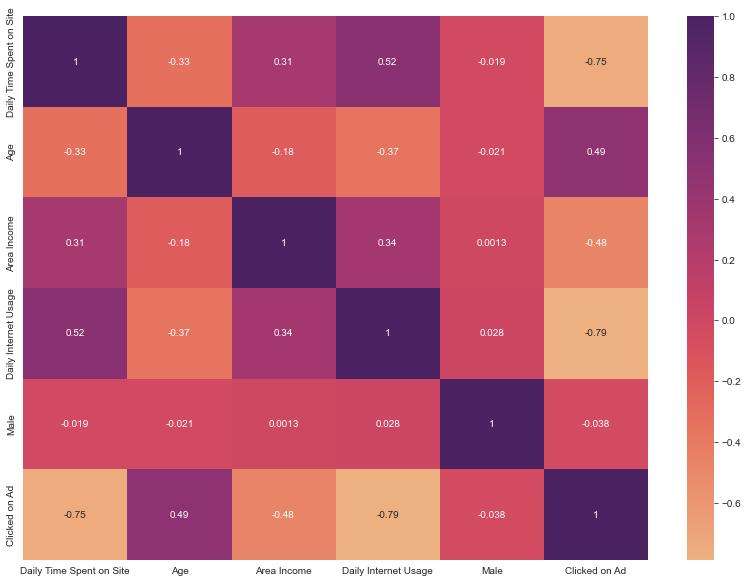

In [48]:
plt.figure(figsize=(14,10))
hm = sns.heatmap(df.corr(), annot=True, cmap="flare")
plt.show()

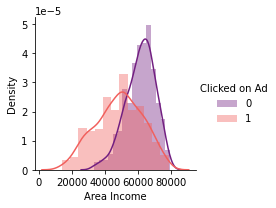

In [11]:
sns.FacetGrid(df, hue='Clicked on Ad', palette='magma').map(sns.distplot, 'Area Income').add_legend()

Ads are more clicked by people with average income(30000-60000) 

People with high income tend to avoid these ads.

### Pairplot between different variables for better visualization

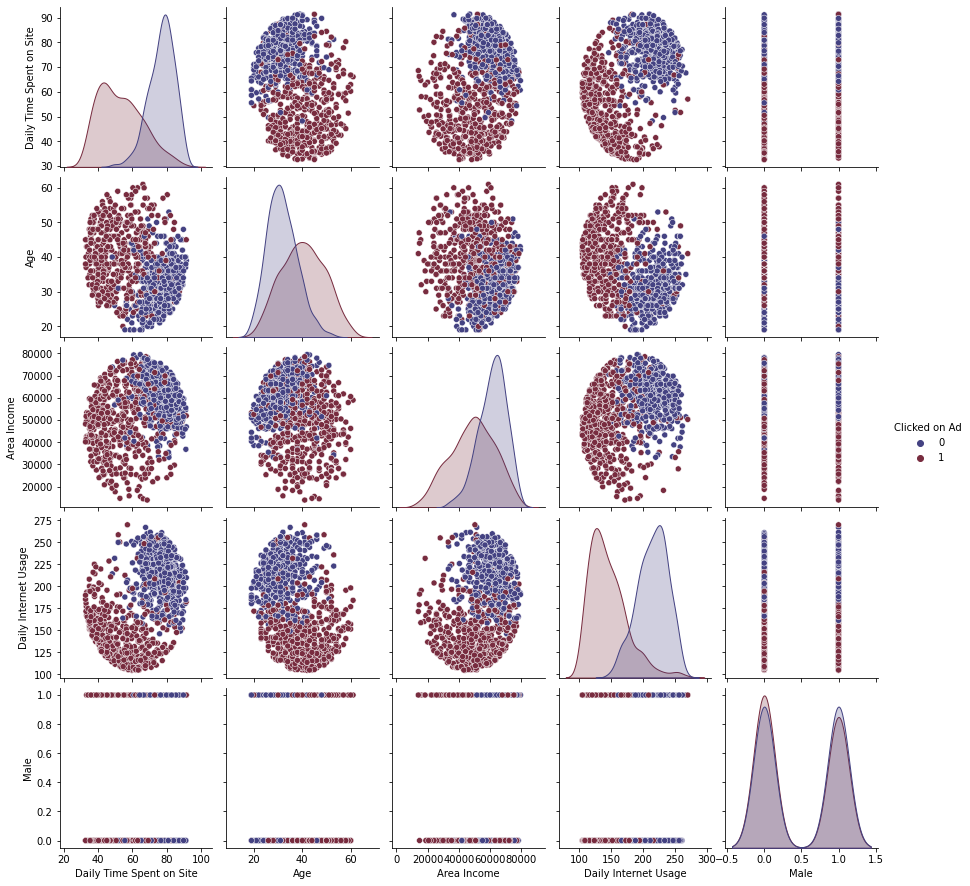

In [13]:
sns.pairplot(df,hue='Clicked on Ad',palette='icefire')

### Preparing , Training and Testing the Data

In [16]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=5)

### Logistic regression

In [18]:
lm = LogisticRegression(random_state=5)
lm.fit(xtrain, ytrain)

LogisticRegression(random_state=5)

#### Confusion matrix

In [25]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)
cm = confusion_matrix(ytest, ypred_test)
cm

array([[119,   7],
       [ 16, 108]], dtype=int64)

In [29]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 89.33333333333333
Accuracy of testing data: 90.8


### Support Vector Machine

In [30]:
svc = SVC(C=10)
svc.fit(xtrain, ytrain)

SVC(C=10)

#### Confusion matrix

In [31]:
ypred_train = svc.predict(xtrain)
ypred_test = svc.predict(xtest)
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[111,  60],
       [ 15,  64]], dtype=int64)

In [32]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 71.73333333333333
Accuracy of testing data: 70.0


### K Nearest Neighbor

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

#### Confusion matrix

In [34]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[101,  34],
       [ 25,  90]], dtype=int64)

In [35]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 76.4


### Decission Tree

In [36]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

#### Confusion matrix

In [37]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[118,   8],
       [  8, 116]], dtype=int64)

In [38]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 100.0
Accuracy of testing data: 93.60000000000001


### Random Forest

In [40]:
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

#### Confusion matrix

In [41]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[122,   9],
       [  4, 115]], dtype=int64)

In [42]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 100.0
Accuracy of testing data: 94.8


### Comparing accuracies of different models

In [44]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'KNN', ac4:'Decission Tree', ac5: 'Random Forest'}

<AxesSubplot:>

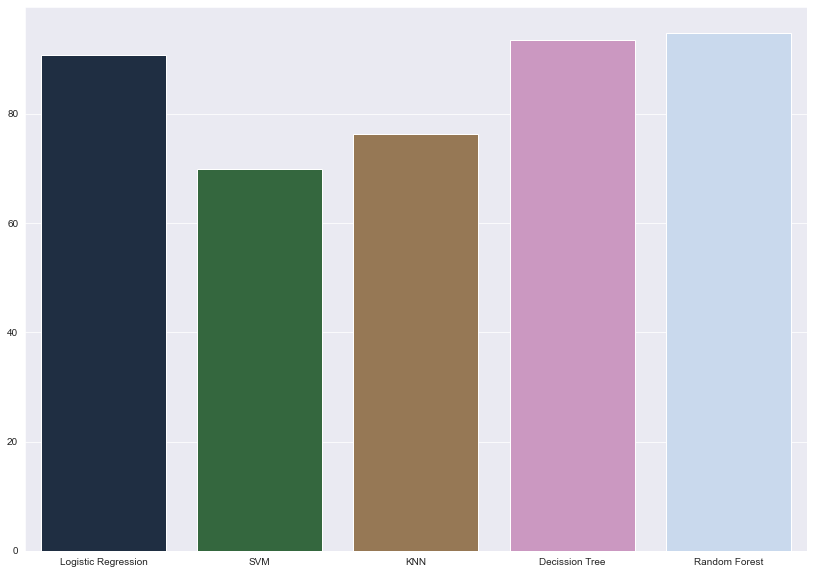

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='cubehelix')